# Description

See description in notebook `10_00-spectral_clustering...`.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 100000

In [6]:
CLUSTERING_METHOD_NAME = "DeltaSpectralClustering"

In [7]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

# Load data

In [8]:
INPUT_SUBSET = "umap"

In [9]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [11]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

In [12]:
data = pd.read_pickle(input_filepath)

In [13]:
data.shape

(3752, 50)

In [14]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,9.587280,8.050184,9.340894,8.884522,4.562011,9.261327,9.078164,8.009141,9.288872,9.827831,...,9.753575,0.440851,-0.077164,-0.184829,9.345852,0.622542,-0.051136,4.266558,8.047482,-0.317385
100002_raw-Energy,9.910512,8.372274,9.605316,9.808598,4.641970,9.360196,8.848985,7.768594,9.231921,9.328465,...,9.647689,0.581584,0.547930,0.600128,8.976416,1.249645,0.234843,4.636343,7.173085,0.137119
100003_raw-Protein,9.923088,8.380640,9.609899,9.836457,4.647365,9.366775,8.835996,7.767549,9.230281,9.314386,...,9.642637,0.580362,0.565898,0.621073,8.967297,1.271435,0.243960,4.648671,7.149967,0.148192
100004_raw-Fat,9.898531,8.375697,9.600443,9.785713,4.639249,9.360721,8.886237,7.783376,9.237095,9.345434,...,9.648270,0.573073,0.521042,0.576926,8.979161,1.227988,0.231848,4.622777,7.205517,0.147385
100005_raw-Carbohydrate,9.895807,8.376662,9.605841,9.791338,4.636903,9.352356,8.867312,7.774787,9.233479,9.344456,...,9.652949,0.575161,0.529565,0.579919,8.988125,1.231771,0.226778,4.624360,7.194818,0.123104


In [15]:
traits = data.index.tolist()

In [16]:
len(traits)

3752

# Load coassociation matrix (ensemble)

In [17]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [18]:
coassoc_matrix = np.load(input_file)

In [19]:
coassoc_matrix = pd.DataFrame(
    data=coassoc_matrix,
    index=traits,
    columns=traits,
)

In [20]:
coassoc_matrix.shape

(3752, 3752)

In [21]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,0.000000,0.314971,0.328000,0.367543,0.341257,0.369347,0.361951,0.354124,0.330439,0.364853,...,0.461101,0.443161,0.440617,0.442608,0.486303,0.359294,0.430441,0.479511,0.411417,0.644333
100002_raw-Energy,0.314971,0.000000,0.041534,0.076677,0.049064,0.078977,0.092762,0.068478,0.066438,0.629198,...,0.678784,0.683862,0.661792,0.686445,0.685388,0.616157,0.670675,0.678686,0.648605,0.674960
100003_raw-Protein,0.328000,0.041534,0.000000,0.102465,0.058421,0.104771,0.117041,0.090390,0.074201,0.639022,...,0.678326,0.688199,0.673446,0.686216,0.670548,0.614560,0.664662,0.664080,0.642204,0.677014
100004_raw-Fat,0.367543,0.076677,0.102465,0.000000,0.052031,0.005250,0.049015,0.029674,0.107763,0.603838,...,0.652949,0.645971,0.627514,0.654724,0.648858,0.667503,0.711378,0.652214,0.692273,0.646656
100005_raw-Carbohydrate,0.341257,0.049064,0.058421,0.052031,0.000000,0.055010,0.070316,0.036293,0.097489,0.612063,...,0.661866,0.668112,0.642139,0.667047,0.665525,0.646965,0.701203,0.659288,0.679241,0.653047


In [22]:
dist_matrix = coassoc_matrix

# Clustering

In [23]:
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
)

## More exhaustive test

Here I run some test across several `k` and `delta` values; then I check how results perform with different clustering quality measures.

In [24]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [
    2,
    4,
    6,
    8,
    10,
    12,
    14,
    16,
    18,
    20,
    25,
    30,
    35,
    40,
    50,
    60,
]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["DELTAS"] = [
    5.00,
    2.00,
    1.00,
    0.90,
    0.75,
    0.50,
    0.30,
    0.25,
    0.20,
]

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'DELTAS': [5.0, 2.0, 1.0, 0.9, 0.75, 0.5, 0.3, 0.25, 0.2]}

### Generate ensemble

In [25]:
import tempfile

In [26]:
ensemble_folder = Path(
    tempfile.gettempdir(),
    "pre_cluster_analysis",
    CLUSTERING_METHOD_NAME,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [27]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(CLUSTERING_OPTIONS, prefix="ensemble-", suffix=".pkl"),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/DeltaSpectralClustering/ensemble-DELTAS_50_20_10_09_075_05_03_025_02-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_12_14_16_18_20_25_30_35_40_50_60-N_REPS_PER_K_5.pkl')

In [28]:
assert ensemble_file.exists(), "Ensemble file does not exists"

In [29]:
ensemble = pd.read_pickle(ensemble_file)

In [30]:
ensemble.shape

(720, 7)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #3,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #4,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,41.607744,7.229253


### Add clustering quality measures

In [32]:
ensemble = ensemble.assign(
    #     si_score=ensemble["partition"].apply(lambda x: silhouette_score(dist_matrix, x, metric="precomputed")),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [33]:
ensemble.shape

(720, 7)

In [34]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,33.756059,7.822267
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,33.756059,7.822267
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,33.756059,7.822267
DeltaSpectralClustering #3,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,33.756059,7.822267
DeltaSpectralClustering #4,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,33.756059,7.822267


# Cluster quality

In [35]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "delta"]).mean()
    display(_df)

si_score     ch_score  db_score
n_clusters delta                                 
2          0.20   0.413614   137.751690  0.281444
           0.25   0.413614   137.751690  0.281444
           0.30   0.368615   310.982482  1.067361
           0.50   0.234743    32.038951  7.925797
           0.75   0.231760    33.728043  7.789270
           0.90   0.231284    33.146865  7.869836
           1.00   0.231165    33.331512  7.852162
           2.00   0.230672    33.424719  7.855023
           5.00   0.230244    33.756059  7.822267
4          0.20   0.360273   282.497790  0.290814
           0.25   0.360535   188.410917  0.816116
           0.30   0.242972   190.583977  5.233446
           0.50   0.082288   548.840287  3.248295
           0.75   0.084110   429.734349  3.533231
           0.90   0.083880   477.828956  3.298054
           1.00   0.083580   503.631209  3.226142
           2.00   0.083282   505.758298  3.156348
           5.00   0.083348   501.791528  3.191586
6          0.20   0.366359   172.457370  1.573231
           0.25   0.365797   172.771501  1.110255
           0.30   0.236124   117.010059  4.180070
           0.50   0.109237   859.630106  2.034674
           0.75   0.111349   758.965696  2.205376
           0.90   0.111232   753.501800  2.229374
           1.00   0.111185   751.721129  2.237650
           2.00   0.111246   752.742050  2.229602
           5.00   0.111201   755.909373  2.221724
8          0.20   0.357209   124.082178  1.311820
           0.25   0.236339   125.444991  3.452698
           0.30   0.097090   359.266508  2.125001
           0.50   0.128245  1279.323741  1.954205
           0.75   0.130530  1216.668542  2.015645
           0.90   0.126823  1057.411749  1.801739
           1.00   0.126990  1055.918846  1.802507
           2.00   0.126434  1026.284498  1.898464
           5.00   0.126459  1026.600148  1.901557
10         0.20   0.284170    98.496716  1.275135
           0.25   0.355434    96.515005  1.243043
           0.30   0.124279   796.545252  1.379184
           0.50   0.144429  1246.910833  1.838009
           0.75   0.143755  1247.650695  1.897406
           0.90   0.143632  1247.234584  1.898532
           1.00   0.143715  1246.652189  1.899084
           2.00   0.142988  1249.610358  1.894530
           5.00   0.143260  1255.244169  1.901625
12         0.20   0.285607    80.699891  1.609162
           0.25   0.233302    80.477008  2.557945
           0.30   0.135423  1319.673699  1.080120
           0.50   0.150808  1187.596261  1.568501
           0.75   0.151032  1220.630344  1.786277
           0.90   0.151315  1213.155746  1.794319
           1.00   0.151144  1223.179324  1.788232
           2.00   0.150650  1226.091361  1.787821
           5.00   0.150593  1226.788494  1.787904
14         0.20   0.227774    70.365695  2.190468
           0.25   0.231886    68.083718  2.630830
           0.30   0.140035  1046.689984  2.186904
           0.50   0.158400  1210.434258  1.428421
           0.75   0.152182  1231.322901  1.750593
           0.90   0.153292  1250.306327  1.709735
           1.00   0.153992  1159.616555  1.732816
           2.00   0.153823  1332.452649  1.637684
           5.00   0.153659  1257.172604  1.686485
16         0.20   0.283238    60.466074  1.654299
           0.25   0.223490    60.218684  2.638190
           0.30   0.144274   985.955004  2.353099
           0.50   0.161586  1297.517270  1.287672
           0.75   0.161521  1200.247291  1.562840
           0.90   0.160940  1248.149432  1.545715
           1.00   0.157733  1149.635981  1.660977
           2.00   0.155862  1187.329089  1.626350
           5.00   0.161450  1255.532662  1.545014
18         0.20   0.249320    54.106429  1.494346
           0.25   0.125457   180.023450  1.848225
           0.30   0.144546   858.934120  1.798305
           0.50   0.166115  1222.323493  1.197736
           0.75   0.162603  1123.926915  1.531659
           0.90   0.160297  1127.813634  1.531494
           1.00   

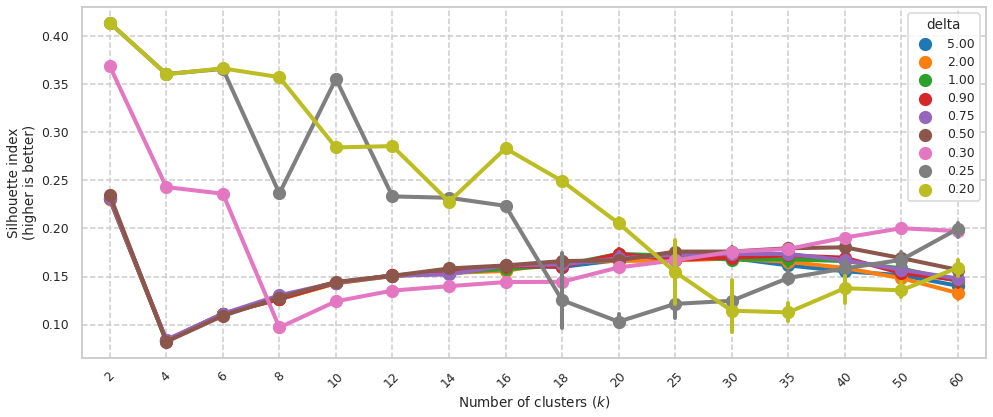

In [36]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="delta")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

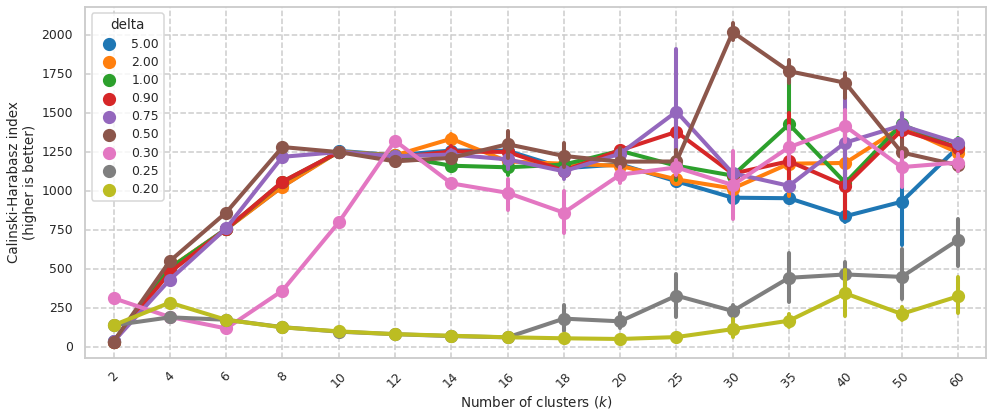

In [37]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="delta")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

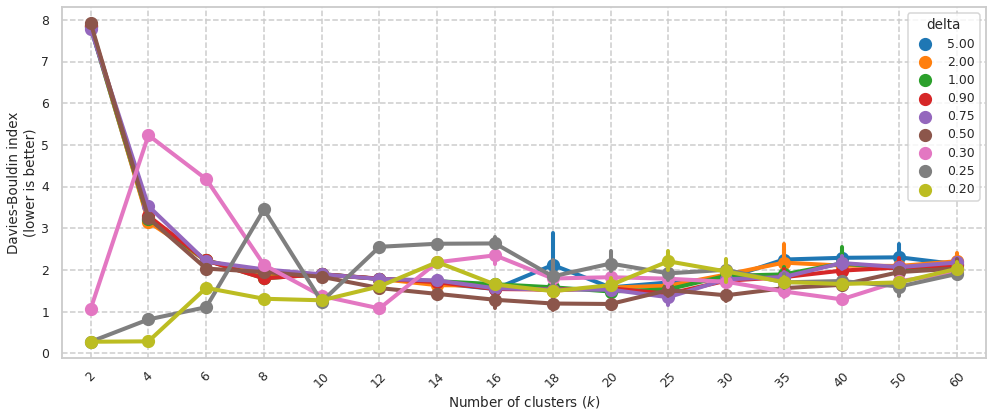

In [38]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="delta")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()